# Deep Learning (Fall 2023) - Homework 4

*Developed by Hongtau Wu & Suzanna Sia. Modified by Ping-Cheng Ku*

This notebook contains all starter code for Homework 4. Please read the written assignment carefully to ensure you include all necessary outputs in your final report. Your submission to Homework 4-notebook should include this notebook (.ipynb file), and a PDF (.pdf) of this notebook, and the hw4_utils.py file.

## Problem 1a)

### Imports

In [27]:
## External Libararies
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

### Data Loading

In [366]:
# Spectify Path to Provided Data Here
DATA_PATH = 'fall23_hw4_prob2_data.npy'

## Load Data and Check Dimensionality
data = np.load(DATA_PATH)
Y = data[:,2]
X = data[:,0:2]
print("Y:", Y.shape)
print("X:", X.shape)

## Polygon Boundaries
p = [[[500, 1000], [300, 800], [400, 600], [600, 600], [700, 800]],
     [[500, 600], [100, 400], [300, 200], [700, 200], [900, 400]]]
p = np.asarray(p)
p0 = p[0]
p1 = p[1]

Y: (60000,)
X: (60000, 2)


### Visualization Code

Do not touch any of the visualization code below.

In [367]:
## Helper code for visualisation (No Need to Touch)
def visualize_polygons(p0, p1):

    fig, ax = plt.subplots()
    patches = []
    polygon1 = Polygon(p0, True)
    polygon2 = Polygon(p1, True)
    patches.append(polygon1)
    patches.append(polygon2)
    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)
    ax.add_collection(p)
    ax.autoscale_view()
    plt.show()

def visualize_datapoints(X, Y):

    assert(X.shape[0] == Y.shape[0])
    fig, ax = plt.subplots()
    npts = 60000
    col = np.where(Y[:npts]==1,'m','b')
    x1 = X[:npts][:,0]
    x2 = X[:npts][:,1]
    ax.scatter(x1, x2, s=0.5, c=col, zorder=1)
    plt.show()

TypeError: Polygon.__init__() takes 2 positional arguments but 3 were given

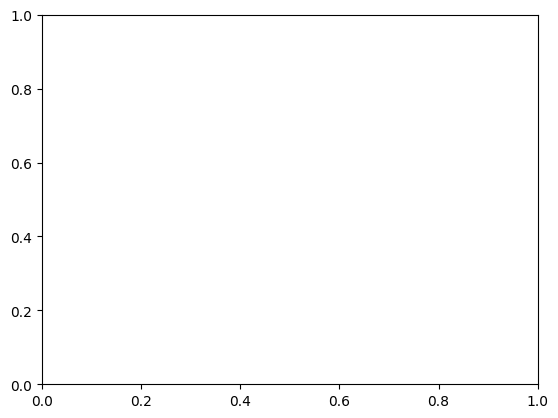

In [368]:
visualize_polygons(p0,p1)


Please fill in all code blocks marked with a #TODO.

In [369]:
def threshold_activation1(x):
    """
    TODO: Implement one activation function (unit step function)

    Args:
      x (np.ndarray): input array

    Returns (np.ndarray): output array (with the same shape as input array)

    """
    # TODO:
    threshold = 0
    output = np.zeros_like(x)
    output[x >= threshold] = 1

    return output


def and_gate(x):
    """
    TODO: Implement an "AND" gate

    Args:
      x (np.ndarray): array with shape (n, 1), representing n neurons as inputs.

    Returns: (int): scalar of 1 or 0
    """
    # TODO:
    output = 1
    for i in x:
      if i != 1:
        output = 0
        break
    return output


def or_gate(x):
    """
    TODO: Implement an "OR" gate

    Args:
      x (np.ndarray): array with shape (n, 1)

    Returns: (int): scalar of 1 or 0
    """
    # TODO:
    output = 0
    for i in x:
      if i == 1:
        output = 1
        break
    return output

def analytical_parameters(p0, p1):
    """

    """
    ## Dimensionality
    x_dim = 2
    class_num = 2
    hidden_unit_num = 10
    # First Layer Parameter
    W = np.zeros((hidden_unit_num, x_dim))
    b = np.zeros((hidden_unit_num, 1))
    for i in range(5):
        # First polygon
        x1 = p0[i, 0]
        y1 = p0[i, 1]
        x2 = p0[(i+1)%5, 0]
        y2 = p0[(i+1)%5, 1]
        W[i, :] = [y1 - y2, x2 - x1]
        b[i, :] = x1 * y2 - x2 * y1
        # Second polygon
        x1 = p1[i, 0]
        y1 = p1[i, 1]
        x2 = p1[(i+1)%5, 0]
        y2 = p1[(i+1)%5, 1]
        W[i + 5, :] = [y1 - y2, x2 - x1]
        b[i + 5, :] = x1 * y2 - x2 * y1
    return W,b

def predict_output_v1(X, W, b):

    predictions = []
    for idx in range(data.shape[0]):
        x = np.reshape(X[idx, :], (2, 1))     # x.shape (2,1)
        # First layer
        # W.shape (10, 2), b.shape (10, 1)
        first_layer_output = np.matmul(W, x) + b # first_layer_output.shape (10, 1)
        first_layer_output = threshold_activation1(first_layer_output) #first_layer_output.shape (10, 1)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        second_polygon = first_layer_output[5:10, :]
        first_gate_output = and_gate(first_polygon)
        second_gate_output = and_gate(second_polygon)
        # Output layer
        input_to_final_gate = [first_gate_output, second_gate_output]
        prediction = or_gate(input_to_final_gate)
        predictions.append(prediction)
    return predictions

def predict_output_v2(X, W, b):
    """
    #TODO: Update usage of the gates in this function
    """
    ## Cache of Predictions
    predictions = []
    ## Cycle Trhough Data Points
    for idx in range(data.shape[0]):
        x = np.reshape(X[idx, :], (2, 1))
        # First layer
        first_layer_output = np.matmul(W, x) + b
        first_layer_output = threshold_activation1(first_layer_output)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        second_polygon = first_layer_output[5:10, :]
        first_gate_output = and_gate(first_polygon)
        second_gate_output = or_gate(second_polygon)
        # Output layer
        input_to_final_gate = [first_gate_output, second_gate_output]
        prediction = and_gate(input_to_final_gate)
        predictions.append(prediction)
    return predictions

def calc_accuracy(true_y, pred_y):
    """

    """
    true_prediction_num = 0
    for i, py in enumerate(pred_y):
        if py == true_y[i]:
            true_prediction_num += 1
    accuracy = true_prediction_num / len(pred_y)
    print("Accuracy: ", accuracy)
    return accuracy

*Sanity check:* If you correctly implemented the 'and gate' and 'or gate', all points should be classified correctly when you make predictions using `predict_output_v1()`. You should provide the datapoint visualization plot and the accuracy in your report submission.



Accuracy:  1.0


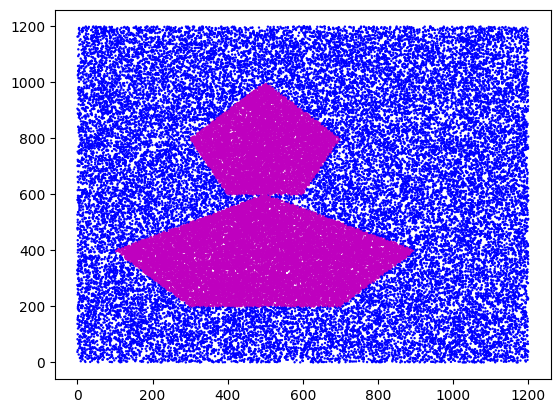

In [370]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v1(X, W, b)

## Compute Accuracy
acc = calc_accuracy(Y, pred_Y)
assert (acc == 1)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))
# print(X)
# print(pred_Y)

In the code above, change the gates in `predict_output_v2()` such that only the points in the top polygon are classified correctly. Visualize your result, report the accuracy of this model, and attach it to the report submission.

To further clarify, you should **only** change the usage of the gating functions, not the code inside the gating function itself.

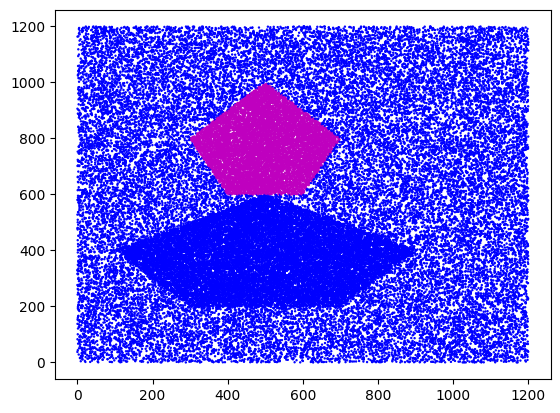

In [371]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v2(X, W, b)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))

## Problem 1b-d

Complete problems 1b through 1d in the space below. Please use markdown to clearly distinguish your answers for each part. Include appropriate visualizations generated here in your final report.


In [372]:
import torch
import torch.nn as nn
import random

In [373]:
## HyperParameters (Do not adjust for Question 1b)##

n_epoch = 500
n_seed = 5
lr = 1
batch_size = 5000

test_split = 1/6

layer_1_node = 10
layer_2_node = 2

#######################
layer_dims = [layer_1_node, layer_2_node]
seed_values = [random.randint(0, 10000) for _ in range(5)]

Complete the implementation of the MLP class and preprocess_data function below. Refer to the pytorch API to understand how a proper model (module) should be set up and initialized.

In [374]:
class MLP(nn.Module):
    """
    MLP class to create a multi-layer perceptron dynamically.

    Args:
        input_dim (int): The dimensionality of the input features.
        layers_dims (list of int): A list specifying the number of units in each hidden layer.
        output_dim (int): The dimensionality of the output.
        seed_value (int, optional): Random seed for reproducibility. If this is set to None, no manual seed is set.

    Attributes:
        layers (nn.ModuleList): A ModuleList to hold all the layers including input, hidden and output layers.
    """

    def __init__(self, input_dim, layers_dims, output_dim, seed_value=None):
        """
        Initialize MLP.
        """
        super(MLP, self).__init__()

        ## TODO:
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_dim, layers_dims[0]))
        # self.layers.append(nn.Sigmoid())

        for i in range(1, len(layers_dims)):
          self.layers.append(nn.Linear(layers_dims[i-1], layers_dims[i]))
        #   self.layers.append(nn.Sigmoid())

        self.layers.append(nn.Linear(layers_dims[-1], output_dim))
        self.seed_value = seed_value
        self._initialize_weights()


    def _initialize_weights(self):
        """
        Initialize the weights and biases of the model.
        """

        ## TODO:
        for layer in self.layers:
          if isinstance(layer, nn.Linear):
            nn.init.xavier_uniform_(layer.weight)
            layer.bias.data.fill_(0.001)
            # nn.init.normal_(layer.bias, mean=0, std=0.01)


    def forward(self, x):
        """
        Forward pass through the network.

        Args:
            x (torch.Tensor): input tensor.

        Returns:
            torch.Tensor: output tensor.
        """
        # TODO:
        for layer in self.layers:
          x = layer(x)
          x = torch.sigmoid(x)
          # print("Layer Output Shape:", x.shape)  # Print the shape of the output at each layer
        return x

In [375]:
def preprocess_data(X, Y, test_split=1/6):
  """
  Base on your observation of the dataset, perform any necessary preprocessing steps given data X and label Y

  Args:
    X, Y (np.ndarry): input arrays
    test_split (float): proportion of data to use for test set (default is set to 1/6)

  Return:
    X_train, X_test, y_train, y_test (torch.Tensor): output tensor objects for training/testing.

  """

  # Note - If you plan to use additional functions, please define them as inner functions
  # under preprocess_data. This will allow us to export preprocess_data function and test
  # it thorough autograder properly. For instance:

  # ... def preprocess_data(X, Y, test_split):
  # ...
  # ...     def inner_func():
  # ...         print("Hello, World!")
  # ...
  # ...     inner_func()

  # Tips: For debugging purposes, it is a good practice to perform unit tests on your inner functions
  # before you place them under the preprocess_data function.

  # TODO:
  # Calculate the number of samples
  num_samples = X.shape[0]
  num_train_samples = int(num_samples * (1-test_split))

  data = np.column_stack((X,Y))
  np.random.shuffle(data)

  X_shuffled = data[:,:-1]
  Y_shuffled = data[:, -1]

  # Split the data into training and testing sets
  X_train, X_test = X_shuffled[:num_train_samples], X_shuffled[num_train_samples:]
  y_train, y_test = Y_shuffled[:num_train_samples], Y_shuffled[num_train_samples:]

  # Standardize X by subtracting the mean and dividing by the standard deviation
  mean = np.mean(X_train, axis=0)
  std = np.std(X_train, axis=0)

  X_train = (X_train - mean) / (std + 1e-8)
  X_test = (X_test - mean) / (std + 1e-8)

  # Convert the data to torch.Tensor objects
  X_train, X_test = torch.FloatTensor(X_train), torch.FloatTensor(X_test)
  y_train, y_test = torch.FloatTensor(y_train), torch.FloatTensor(y_test)

  return X_train, X_test, y_train, y_test

In [376]:
# Reload the data
data = np.load(DATA_PATH)

Y = data[:,2]
X = data[:,0:2]

X_train, X_test, y_train, y_test = preprocess_data(X, Y, test_split)

Implement the train loop (for a single run)


In [378]:
from torch.random import seed
def train(model,
          loss_f,
          optimizer,
          X_train,
          y_train,
          X_test=None,
          y_test=None,
          n_epoch=500,
          batch_size=None,
          seed_value=0):
    """
      The main function for model training.

      Args:
        model (torch.nn.Module): model to train
        loss_f (torch.nn.Module): loss function
        optimizer (torch.optim.Optimizer): optimizer
        X_train, y_train (torch.Tensor): training data
        X_test, y_test (torch.Tensor): test data
        n_epoch (int): number of epochs
        batch_size (int): size of the batch
        seed_value (int): random seed value

      Returns:
        .... (to be added by student)

    """

    # TODO: Complete the train function. You need to implement mini-batch training for this question.
    #
    # Tips: Perform proper sanity checks to ensure your inputs are reasonable. Keep track of important variables
    # (loss, accuracy) throughout the training loop. Print intermediate values reguarly to help you track if
    # your training is working as intended (so that if something is wrong you can terminate the process early
    # instead of going through all 5 runs.)
    # Set random seed for reproducibility
    if seed_value is not None:
        torch.manual_seed(seed_value)

    train_loss_list = []
    train_acc_list = []
    test_loss_list = []
    test_accuracy_list = []

    count = 0
    for epoch in range(n_epoch):
        model.train()
        total_loss = 0.0
        correct_pred = 0
        for batch_start in range(0, X_train.shape[0], batch_size):
            batch_end = batch_start + batch_size
            batch_x = X_train[batch_start:batch_end]
            batch_y = y_train[batch_start:batch_end]
            # print(batch_y.shape)

            optimizer.zero_grad()

            # Before calculating the loss, ensure both tensors have the same shape
            model_output = model(batch_x)
            predicted_labels = (model_output >= 0.5).float()  # Use 0.5 as the threshold
            correct_pred = (predicted_labels == batch_y).float()
            accuracy = correct_pred.mean()

            # Calculate the loss
            loss = loss_f(model_output, batch_y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        train_acc_list.append(accuracy)
        train_loss = total_loss / X_train.shape[0]
        train_loss_list.append(train_loss)

        model.eval()
        with torch.no_grad():
          test_loss = loss_f(model(X_test), y_test)
          test_loss_list.append(test_loss.item())
          prediction = model(X_test)
          predicted_labels = (prediction >= 0.5).float()  # Use 0.5 as the threshold
          correct_pred = (predicted_labels == y_test).float()
          accuracy = correct_pred.mean()
          test_accuracy_list.append(accuracy.item())
        if count == n_epoch-1:
            y_predictions = predicted_labels
        count += 1
    return train_loss_list, train_acc_list, test_loss_list, test_accuracy_list, y_predictions

Now we start the training. We will iterate through 5 runs. To ensure reproducibility of the performance, we will be using the seed values to initialize our MLP and in our training loop. After the training, you should "**check if you can get the same model accuracy if a seed is re-used**".

In [379]:
# TODO: complete the cell
train_loss_lists = []
train_acc_lists = []
test_loss_lists = []
test_accuracy_lists = []
y_predictions = []

for idx in range(len(seed_values)):

    seed_value = seed_values[idx]
    print("~~ Beginning run {} with seed value {} ~~".format(idx, seed_value))

    # Create an instance of the MLP using your provided class
    my_mlp = MLP(input_dim=2, layers_dims=layer_dims, output_dim=1, seed_value=seed_value)

    # Define loss function and optimizer
    loss_fn = nn.BCELoss()
    optimizer = torch.optim.SGD(my_mlp.parameters(), lr=lr)

    y_train = y_train.view(-1,1)
    y_test = y_test.view(-1,1)

    # initial_parameters = [param.clone() for param in my_mlp.parameters()]

    # Train the MLP with the current seed value
    train_loss_list, train_acc_list, test_loss_list, test_accuracy_list, y_prediction = train(my_mlp, loss_fn, optimizer, X_train, y_train, X_test, y_test, n_epoch=n_epoch, batch_size=batch_size, seed_value=seed_value)

    # for i, param in enumerate(my_mlp.parameters()):
    #   if not torch.equal(param, initial_parameters[i]):
    #       print(f"Parameter {i} has been updated.")

    train_loss_lists.append(train_loss_list)
    train_acc_lists.append(train_acc_list)
    test_loss_lists.append(test_loss_list)
    test_accuracy_lists.append(test_accuracy_list)
    y_predictions.append(y_prediction)

    # Print some information about the training process
    # print("Training completed in run {} with seed value {}.".format(idx, seed_value))
    print("Training loss: {:.8f}".format(train_loss_list[-1]))
    print("Training accuracy: {:.4f}%".format(train_acc_list[-1]))
    # Calculate and print the test accuracy
    print("Test loss: {:.8f}".format(test_loss_list[-1]))
    print("Test accuracy: {:.4f}%".format(test_accuracy_list[-1]))
    print("\n")



~~ Beginning run 0 with seed value 2082 ~~
Training loss: 0.00001850
Training accuracy: 0.9684%
Test loss: 0.09213720
Test accuracy: 0.9653%


~~ Beginning run 1 with seed value 1791 ~~
Training loss: 0.00001827
Training accuracy: 0.9716%
Test loss: 0.09201405
Test accuracy: 0.9672%


~~ Beginning run 2 with seed value 119 ~~
Training loss: 0.00000881
Training accuracy: 0.9868%
Test loss: 0.04326922
Test accuracy: 0.9857%


~~ Beginning run 3 with seed value 4223 ~~
Training loss: 0.00002438
Training accuracy: 0.9548%
Test loss: 0.12343808
Test accuracy: 0.9549%


~~ Beginning run 4 with seed value 8095 ~~
Training loss: 0.00002919
Training accuracy: 0.9484%
Test loss: 0.14816806
Test accuracy: 0.9475%




In [383]:
final_test = []
for i in range(len(test_accuracy_lists)):
    final_test.append(test_accuracy_lists[i][-1])
final_train = []
for i in range(len(train_acc_lists)):
    final_train.append(train_acc_lists[i][-1])

print("Mean of Test Acuracy: {:.4f}".format(np.mean(final_test)))
print("Mean of Train  Acuracy: {:.4f}".format(np.mean(final_train)))
print("STD of Test Acuracy: {:.4f}".format(np.std(final_test)))
print("STD of Train Acuracy: {:.4f}".format(np.std(final_train)))



Mean of Test Acuracy: 0.9641
Mean of Train  Acuracy: 0.9660
STD of Test Acuracy: 0.0129
STD of Train Acuracy: 0.0135


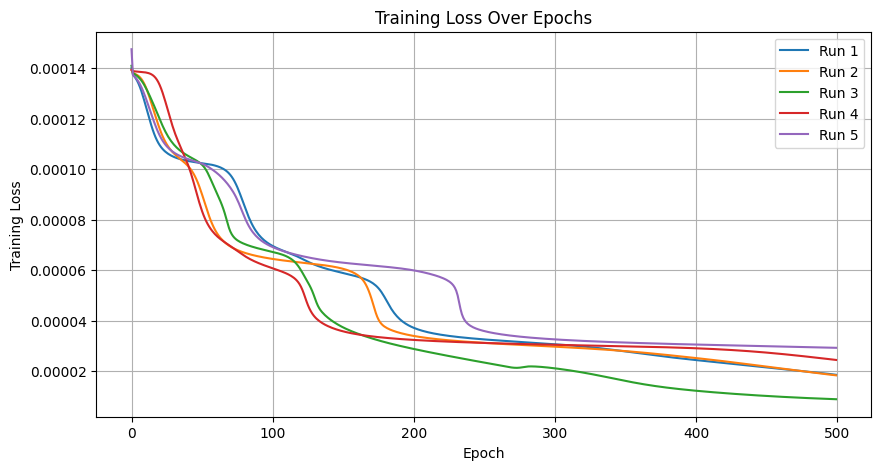

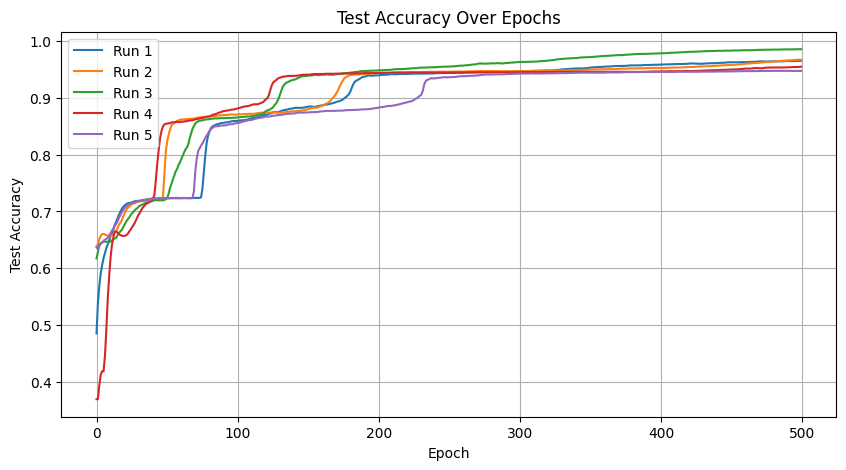

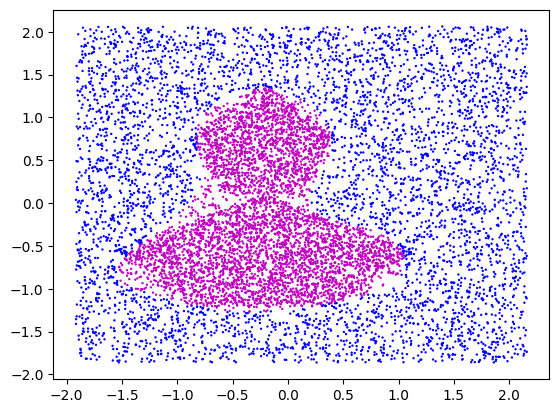

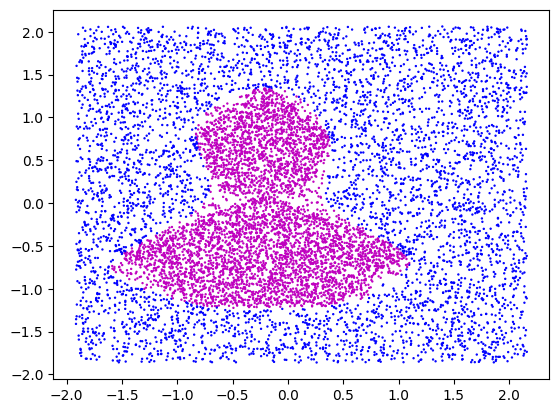

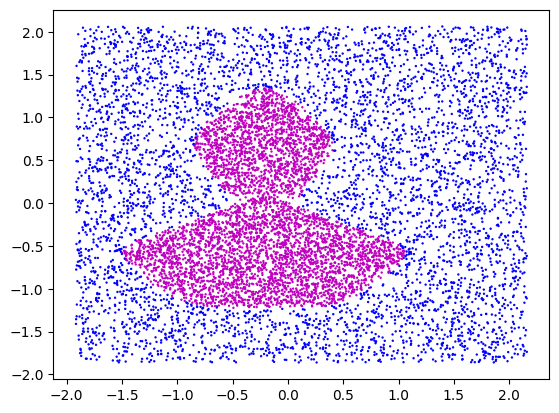

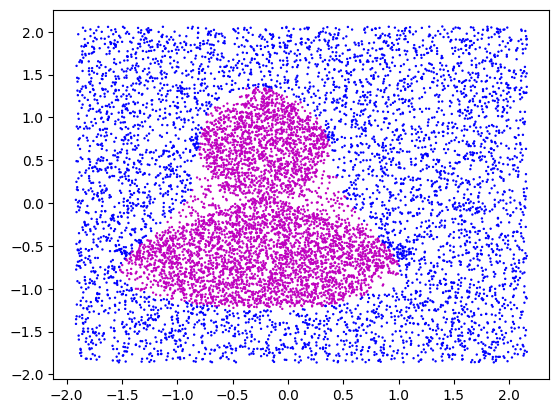

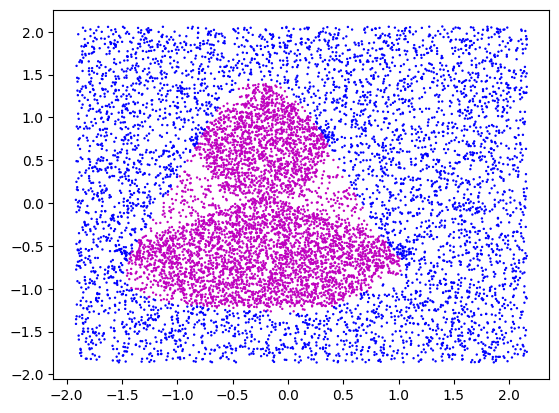

In [381]:
# TODO: Plot Results (Please plot the loss of all 5 runs in a same figure, and
# the accuracy of the runs in another figure). Use visualize_datapoints to check
# the performance of your model.

# Plot Loss
# Create figures for training loss and testing accuracy changes over epochs
plt.figure(figsize=(10, 5))
for i in range(n_seed):
    plt.plot(range(n_epoch), train_loss_lists[i], label=f"Run {i+1}")

plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
for i in range(n_seed):
    plt.plot(range(n_epoch), test_accuracy_lists[i], label=f"Run {i+1}")

plt.title("Test Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()

for i in range(n_seed):
    y_hat = y_predictions[i]
    y_hat = y_hat.view(-1)
    visualize_datapoints(X_test, np.array(y_hat))

In [384]:
# Problem 1c: make adjustments to the layers, and then re-run the training loop with 5 runs and visualizations

## Hyperparameters

n_epoch = 750
n_seed = 5
lr = 1
batch_size = 5000

test_split = 1/6

layer_dims = [32, 16, 8]

##########################
seed_values = [random.randint(0, 10000) for _ in range(5)]

Y = data[:,2]
X = data[:,0:2]

X_train, X_test, y_train, y_test = preprocess_data(X, Y, test_split)
## Iterate over Random Initializations

train_loss_lists = []
train_acc_lists = []
test_loss_lists = []
test_accuracy_lists = []
y_predictions = []

for idx in range(len(seed_values)):

    seed_value = seed_values[idx]
    print("~~ Beginning run {} with seed value {} ~~".format(idx, seed_value))

     # Set the random seed for reproducibility
    torch.manual_seed(seed_value)

    # Create an instance of the MLP using your provided class
    my_mlp = MLP(input_dim=2, layers_dims=layer_dims, output_dim=1, seed_value=seed_value)

    # Define loss function and optimizer
    loss_fn = nn.BCELoss()
    optimizer = torch.optim.SGD(my_mlp.parameters(), lr=lr)

    y_train = y_train.view(-1,1)
    y_test = y_test.view(-1,1)

    # Train the MLP with the current seed value
    train_loss_list, train_acc_list, test_loss_list, test_accuracy_list, y_prediction = train(my_mlp, loss_fn, optimizer, X_train, y_train, X_test, y_test, n_epoch=n_epoch, batch_size=batch_size, seed_value=seed_value)

    # print(y_predictions)

    train_loss_lists.append(train_loss_list)
    train_acc_lists.append(train_acc_list)
    test_loss_lists.append(test_loss_list)
    test_accuracy_lists.append(test_accuracy_list)
    y_predictions.append(y_prediction)

    # Print some information about the training process
    print("Training completed in run {} with seed value {}.".format(idx, seed_value))
    print("Training loss: {:.4f}".format(train_loss_list[-1]))
    print("Training accuracy: {:.4f}%".format(train_acc_list[-1]))
    # Calculate and print the test accuracy
    print("Test loss: {:.4f}".format(test_loss_list[-1]))
    print("Test accuracy: {:.4f}%".format(test_accuracy_list[-1]))
    print("\n")


~~ Beginning run 0 with seed value 8045 ~~
Training completed in run 0 with seed value 8045.
Training loss: 0.0000
Training accuracy: 0.9882%
Test loss: 0.0440
Test accuracy: 0.9814%


~~ Beginning run 1 with seed value 9825 ~~
Training completed in run 1 with seed value 9825.
Training loss: 0.0000
Training accuracy: 0.9918%
Test loss: 0.0379
Test accuracy: 0.9871%


~~ Beginning run 2 with seed value 1795 ~~
Training completed in run 2 with seed value 1795.
Training loss: 0.0000
Training accuracy: 0.9902%
Test loss: 0.0367
Test accuracy: 0.9843%


~~ Beginning run 3 with seed value 7591 ~~
Training completed in run 3 with seed value 7591.
Training loss: 0.0000
Training accuracy: 0.9918%
Test loss: 0.0287
Test accuracy: 0.9897%


~~ Beginning run 4 with seed value 2219 ~~
Training completed in run 4 with seed value 2219.
Training loss: 0.0000
Training accuracy: 0.9918%
Test loss: 0.0351
Test accuracy: 0.9853%




Mean of Test Acuracy: 0.9856
Mean of Train  Acuracy: 0.9908
STD of Test Acuracy: 0.0028
STD of Train Acuracy: 0.0014


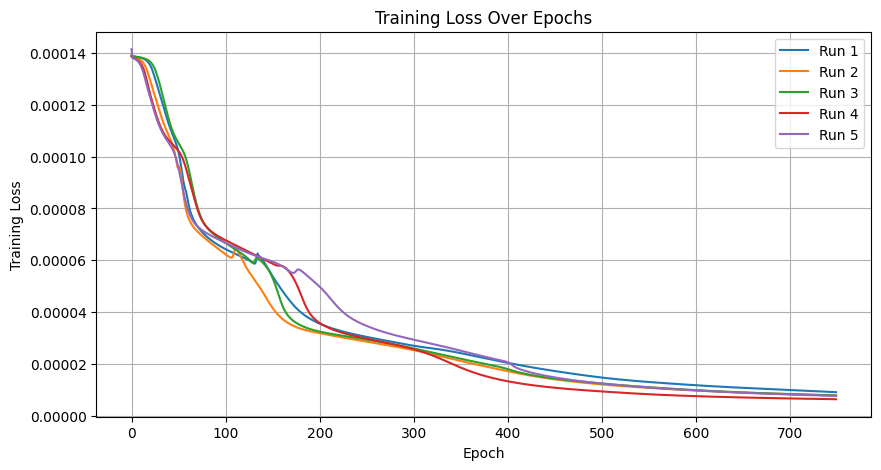

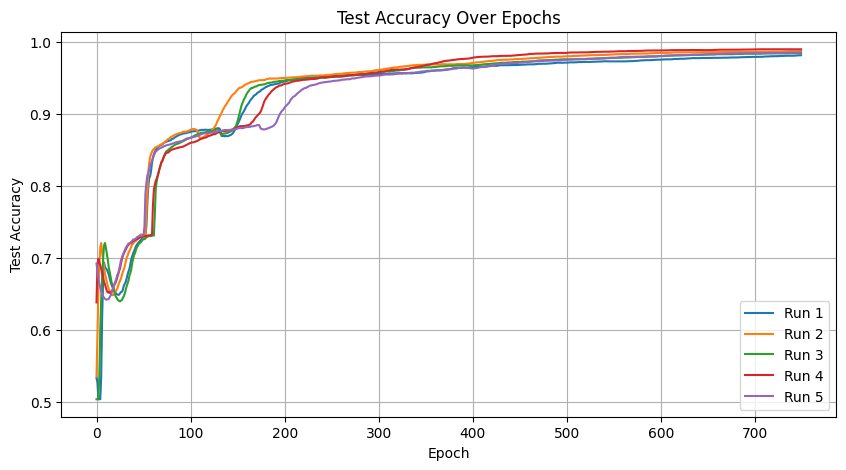

In [386]:

# calculate the average and std of test and train accuracy 
final_test = []
for i in range(len(test_accuracy_lists)):
    final_test.append(test_accuracy_lists[i][-1])
final_train = []
for i in range(len(train_acc_lists)):
    final_train.append(train_acc_lists[i][-1])

print("Mean of Test Acuracy: {:.4f}".format(np.mean(final_test)))
print("Mean of Train  Acuracy: {:.4f}".format(np.mean(final_train)))
print("STD of Test Acuracy: {:.4f}".format(np.std(final_test)))
print("STD of Train Acuracy: {:.4f}".format(np.std(final_train)))


# Plot Loss
# Create figures for training loss and testing accuracy changes over epochs
plt.figure(figsize=(10, 5))
for i in range(n_seed):
    plt.plot(range(n_epoch), train_loss_lists[i], label=f"Run {i+1}")

plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
for i in range(n_seed):
    plt.plot(range(n_epoch), test_accuracy_lists[i], label=f"Run {i+1}")

plt.title("Test Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()


tensor([1., 0., 0.,  ..., 1., 1., 0.])


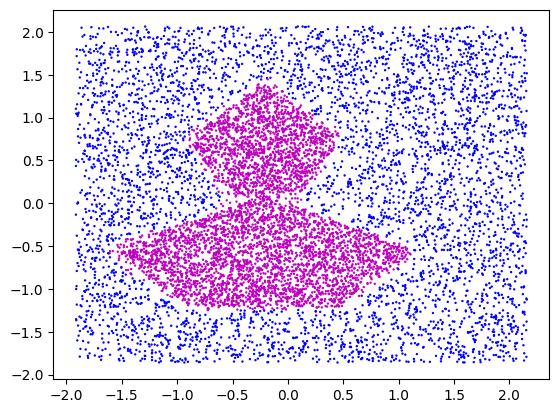

tensor([1., 0., 0.,  ..., 1., 1., 0.])


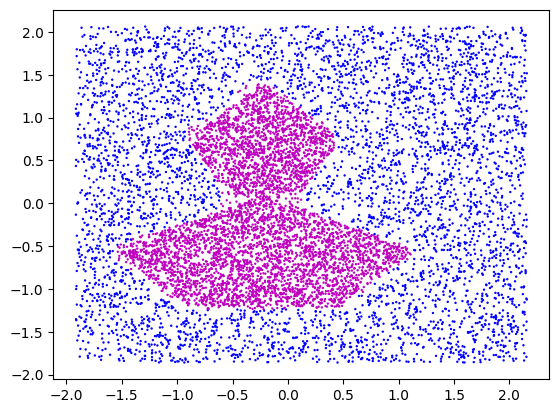

tensor([1., 0., 0.,  ..., 1., 1., 0.])


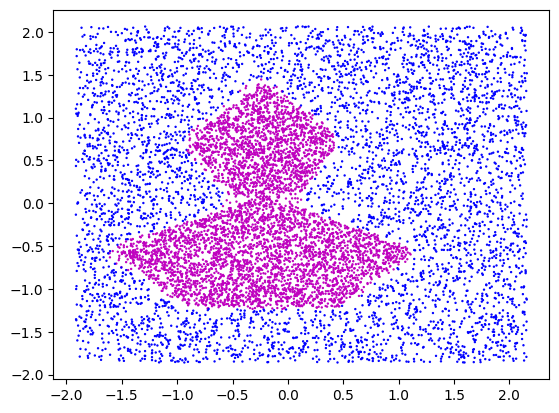

tensor([1., 0., 0.,  ..., 1., 1., 0.])


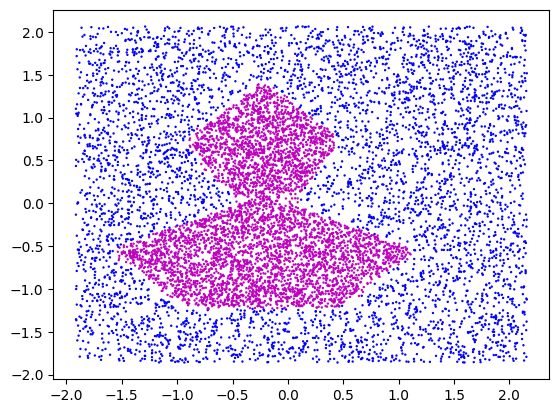

tensor([1., 0., 0.,  ..., 1., 1., 0.])


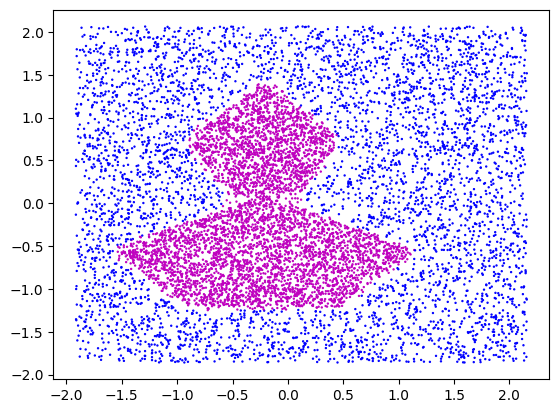

In [387]:

for i in range(n_seed):
    y_hat = y_predictions[i]
    y_hat = y_hat.view(-1)
    print(y_hat)
    visualize_datapoints(X_test, np.array(y_hat))


For Problem 1d, please write your response in the Latex report.

## Problem 2

All code for Problem 2 should go below. We provide data loaders and relevant imports to get you started. If you are working locally (instead of using Google Colab), we recommend using Conda to install pytorch (https://pytorch.org).

### Imports

In [1]:
## Additional External Libraries (Deep Learning)
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from torchvision import transforms as tfs
from PIL import Image
from torchvision.datasets import FashionMNIST

### Data Loading

In [2]:
# Hyperparameter (Feel free to make modifications)
TRAIN_BATCH_SIZE = 50
VAL_BATCH_SIZE = 50
TEST_BATCH_SIZE = 1

# Transform data to PIL images
transforms = tfs.Compose([tfs.ToTensor()])

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

## Problem 2a)

### Design Model

In [18]:
class CNNet_2a(nn.Module):

    def __init__(self):
        """

        """
        ## Inherent Torch Module
        super(CNNet_2a, self).__init__()

        ##TODO: Initialize Model Layers
        # Define the layers of your neural network here

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=8, padding=1)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=12, padding=1)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # 2 fully connected layers
        self.fc1 = nn.Linear(16, 64)
        self.fc2 = nn.Linear(64, 10)


    def forward(self, x):
        """

        """
        ##TODO: Setup Forward Pass
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))

        # print(x.shape)
        x = x.view(x.shape[0], -1)
        # print(x.shape)

        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### Model Training

In [23]:
def train(model,
          loss_f,
          optimizer,
          n_epoch=50,
          train_dataloader=train_dataloader,
          val_dataloader=val_dataloader,
          test_dataloader=test_dataloader,
          seed_value=None):
    """

    """
    ##TODO: Implement training loop
    train_loss_list = []
    train_accuracy_list = []
    test_loss_list = []
    test_accuracy_list = []
    val_accuracy_list = []
    val_loss_list = []

    if seed_value is not None:
        torch.manual_seed(seed_value)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for epoch in range(n_epoch):
        # Training loop
        model.train()
        train_loss = 0.0
        total_train = 0.0
        correct_train = 0.0
        for batch_idx, (data, target) in enumerate(train_dataloader):
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            output = model(data)

            loss = loss_f(output, target)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            _, predicted = output.max(1)
            total_train += target.size(0)
            correct_train += predicted.eq(target).sum().item()

        avg_train_loss = train_loss / len(train_dataloader)
        train_loss_list.append(avg_train_loss)
        train_accuracy = 100 * correct_train / total_train
        train_accuracy_list.append(train_accuracy)

        model.eval()
        val_loss = 0.0
        total_val = 0.0
        correct_val = 0.0
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(val_dataloader):
                data, target = data.to(device), target.to(device)

                output = model(data)

                loss = loss_f(output, target)

                val_loss += loss.item()

                _, predicted = output.max(1)
                total_val += target.size(0)
                correct_val += predicted.eq(target).sum().item()

        avg_val_loss = val_loss / len(val_dataloader)
        val_accuracy = 100 * correct_val / total_val
        val_loss_list.append(avg_val_loss)
        val_accuracy_list.append(val_accuracy)

        print(f"Epoch [{epoch + 1}/{n_epoch}] - Train Loss: {avg_train_loss:.8f} - Train Accuracy: {train_accuracy:.4f}%")
        print(f"Epoch [{epoch + 1}/{n_epoch}] - Val Loss: {avg_val_loss:.8f} - Val Accuracy: {val_accuracy:.4f}%")

    model.eval()
    test_loss = 0.0
    correct = 0.0
    total = 0.0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_dataloader):
            data, target = data.to(device), target.to(device)

            output = model(data)

            loss = loss_f(output, target)

            test_loss += loss.item()

            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

    avg_test_loss = test_loss / len(test_dataloader)
    test_accuracy = 100 * correct / total
    test_loss_list.append(avg_test_loss)
    test_accuracy_list.append(test_accuracy)
    print(f"Test Loss: {avg_test_loss:.4f} - Test Accuracy: {test_accuracy:.2f}%")
    return train_loss_list, train_accuracy_list, val_loss_list, val_accuracy_list, test_loss_list, test_accuracy_list

In [24]:
## TODO: choose reasonable hyperparameters (feel free to make adjustments)
n_epoch = 50
model = CNNet_2a()
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = lr, weight_decay=0.005)
loss_f = nn.CrossEntropyLoss()

In [25]:
## Run Training Loop
train_loss, train_accuracy, val_loss, val_accuracy, _, test_accuracy = train(model, loss_f, optimizer, n_epoch=n_epoch)

Epoch [1/50] - Train Loss: 0.72015678 - Train Accuracy: 73.0280%
Epoch [1/50] - Val Loss: 0.52670091 - Val Accuracy: 80.1900%
Epoch [2/50] - Train Loss: 0.50435660 - Train Accuracy: 81.5180%
Epoch [2/50] - Val Loss: 0.47283012 - Val Accuracy: 82.7100%
Epoch [3/50] - Train Loss: 0.46290741 - Train Accuracy: 83.3740%
Epoch [3/50] - Val Loss: 0.45596216 - Val Accuracy: 83.5800%
Epoch [4/50] - Train Loss: 0.42589999 - Train Accuracy: 84.9980%
Epoch [4/50] - Val Loss: 0.41756551 - Val Accuracy: 85.6400%
Epoch [5/50] - Train Loss: 0.40628690 - Train Accuracy: 85.5220%
Epoch [5/50] - Val Loss: 0.43977981 - Val Accuracy: 84.5700%
Epoch [6/50] - Train Loss: 0.39015432 - Train Accuracy: 86.3200%
Epoch [6/50] - Val Loss: 0.38860317 - Val Accuracy: 86.8200%
Epoch [7/50] - Train Loss: 0.37993733 - Train Accuracy: 86.5540%
Epoch [7/50] - Val Loss: 0.38627589 - Val Accuracy: 86.2200%
Epoch [8/50] - Train Loss: 0.37131154 - Train Accuracy: 87.0440%
Epoch [8/50] - Val Loss: 0.40194249 - Val Accuracy: 8

Best Train Accuracy: 89.20%
Best Validation Accuracy: 88.74%
Best Test Accuracy: 87.56%


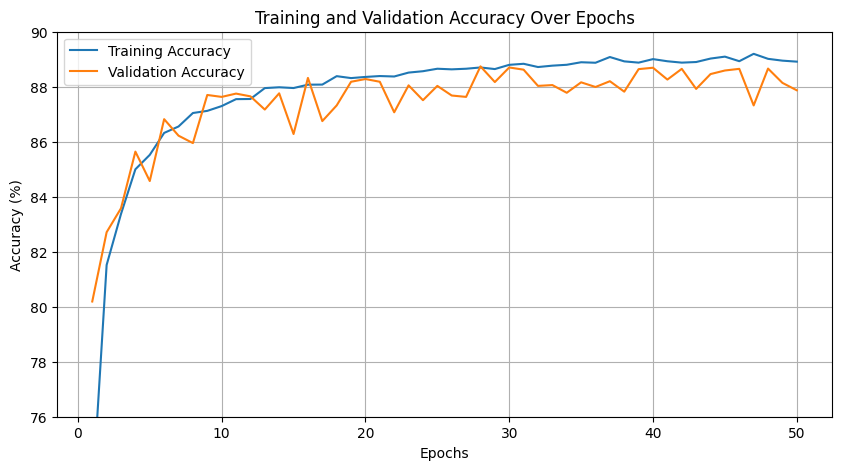

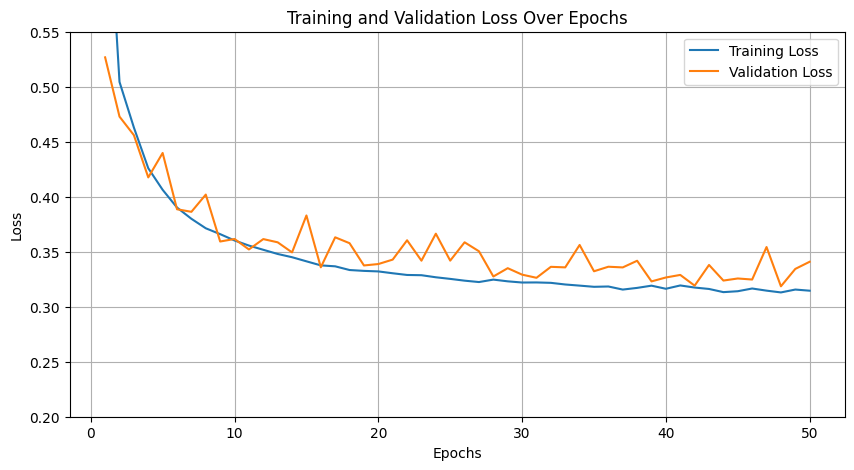

In [28]:
print(f"Best Train Accuracy: {max(train_accuracy):.2f}%")
print(f"Best Validation Accuracy: {max(val_accuracy):.2f}%")
print(f"Best Test Accuracy: {max(test_accuracy):.2f}%")

# Plot Accuracy
epochs = range(1, n_epoch + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
# Set y-axis limits to 0 to 100
plt.ylim(76, 90)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
# Set y-axis limits to 0 to 100
plt.ylim(0.2, 0.55)
plt.show()

## Problem 2b)

Now try to improve your model using additional techniques learned during class. You should be able to use the same training function as above, but will need to create a new model architecture.

### Data Loading

You should maintain the splits from above, but feel free to alter the dataloaders (i.e. transforms) as you wish.

In [29]:
# Hyperparameter (Feel Free to Change These, but Make Sure your Training Loop Still Works as Expected)
TRAIN_BATCH_SIZE = 150
VAL_BATCH_SIZE = 150
TEST_BATCH_SIZE = 1

# Transform data to PIL images
# tfs.RandomHorizontalFlip(),
    # tfs.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    # tfs.RandomResizedCrop(28, scale=(0.8, 1.0)),
    # tfs.RandomAffine(degrees=0, translate=(0.1, 0.1)), tfs.Normalize(mean=[0.5], std=[0.5])]
transforms = tfs.Compose([tfs.RandomRotation(10),
    tfs.ToTensor()])

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

### Model Design

In [30]:
##TODO: Try to improve upon your previous architecture
class CNNet_2b(nn.Module):

  def __init__(self):

    super(CNNet_2b, self).__init__()

    ##TODO: Initialize Model Layers
    # This is the same
    # three hidden layers
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=8, padding=1)
    self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=12, padding=1)

    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    # 2 fully connected layers
    self.fc1 = nn.Linear(32*3*3, 64)
    self.fc2 = nn.Linear(64, 10)

    # batch normalization
    self.bn1 = nn.BatchNorm2d(8)
    self.bn2 = nn.BatchNorm2d(16)


  def forward(self, x):
    # ##TODO: Setup Forward Pass
    x = self.pool(nn.functional.relu(self.bn1(self.conv1(x))))
    x = self.pool(nn.functional.relu(self.bn2(self.conv2(x))))

    # print(x.shape)
    x = x.view(x.shape[0], -1)
    return x
  


In [31]:
def train(model,
          loss_f,
          optimizer,
          scheduler,
          n_epoch=50,
          train_dataloader=train_dataloader,
          val_dataloader=val_dataloader,
          test_dataloader=test_dataloader,
          seed_value=None):
    """

    """
    ##TODO: Implement training loop
    train_loss_list = []
    train_accuracy_list = []
    test_loss_list = []
    test_accuracy_list = []
    val_accuracy_list = []
    val_loss_list = []

    if seed_value is not None:
        torch.manual_seed(seed_value)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for epoch in range(n_epoch):
        # Training loop
        model.train()
        train_loss = 0.0
        total_train = 0.0
        correct_train = 0.0
        for batch_idx, (data, target) in enumerate(train_dataloader):
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            output = model(data)

            loss = loss_f(output, target)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            _, predicted = output.max(1)
            total_train += target.size(0)
            correct_train += predicted.eq(target).sum().item()

        avg_train_loss = train_loss / len(train_dataloader)
        train_loss_list.append(avg_train_loss)
        train_accuracy = 100 * correct_train / total_train
        train_accuracy_list.append(train_accuracy)

        model.eval()
        val_loss = 0.0
        total_val = 0.0
        correct_val = 0.0
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(val_dataloader):
                data, target = data.to(device), target.to(device)

                output = model(data)

                loss = loss_f(output, target)

                val_loss += loss.item()

                _, predicted = output.max(1)
                total_val += target.size(0)
                correct_val += predicted.eq(target).sum().item()

        avg_val_loss = val_loss / len(val_dataloader)
        scheduler.step(avg_val_loss)
        val_accuracy = 100 * correct_val / total_val
        val_loss_list.append(avg_val_loss)
        val_accuracy_list.append(val_accuracy)

        if scheduler.is_better(avg_val_loss, scheduler.best):
            torch.save(model.state_dict(), 'best_model.pth')

        print(f"Epoch [{epoch + 1}/{n_epoch}] - Train Loss: {avg_train_loss:.8f} - Train Accuracy: {train_accuracy:.4f}%")
        print(f"Epoch [{epoch + 1}/{n_epoch}] - Val Loss: {avg_val_loss:.8f} - Val Accuracy: {val_accuracy:.4f}%")

    model.eval()
    test_loss = 0.0
    correct = 0.0
    total = 0.0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_dataloader):
            data, target = data.to(device), target.to(device)

            output = model(data)

            loss = loss_f(output, target)

            test_loss += loss.item()

            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

    avg_test_loss = test_loss / len(test_dataloader)
    test_accuracy = 100 * correct / total
    test_loss_list.append(avg_test_loss)
    test_accuracy_list.append(test_accuracy)
    print(f"Test Loss: {avg_test_loss:.4f} - Test Accuracy: {test_accuracy:.2f}%")
    return train_loss_list, train_accuracy_list, val_loss_list, val_accuracy_list, test_loss_list, test_accuracy_list

### Model Training

In [34]:
##TODO: Fit and evaluate your model. What do you observe?
##TODO: Fit and evaluate your model. What do you observe?
# Define your improved CNN model
model = CNNet_2b()
## TODO: choose reasonable hyperparameters (feel free to make adjustments)
n_epoch = 100
lr = 0.009

optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.99)
loss_f = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer, mode='min', factor=0.99, patience=2, verbose=True)

train_losses, train_accuracy, val_loss, val_accuracy, _, test_accuracy = train(model, loss_f, optimizer, scheduler=scheduler, n_epoch=n_epoch)


Epoch [1/100] - Train Loss: 0.67346717 - Train Accuracy: 77.1940%
Epoch [1/100] - Val Loss: 0.48947336 - Val Accuracy: 81.9500%
Epoch [2/100] - Train Loss: 0.46079295 - Train Accuracy: 83.3640%
Epoch [2/100] - Val Loss: 0.43447482 - Val Accuracy: 83.8600%
Epoch [3/100] - Train Loss: 0.42063099 - Train Accuracy: 84.7820%
Epoch [3/100] - Val Loss: 0.40580331 - Val Accuracy: 85.3000%
Epoch [4/100] - Train Loss: 0.39949764 - Train Accuracy: 85.7020%
Epoch [4/100] - Val Loss: 0.38102828 - Val Accuracy: 86.0300%
Epoch [5/100] - Train Loss: 0.38290801 - Train Accuracy: 86.1920%
Epoch [5/100] - Val Loss: 0.37171885 - Val Accuracy: 86.4100%
Epoch [6/100] - Train Loss: 0.36460710 - Train Accuracy: 87.0160%
Epoch [6/100] - Val Loss: 0.36585477 - Val Accuracy: 86.6200%
Epoch [7/100] - Train Loss: 0.35872231 - Train Accuracy: 87.1760%
Epoch [7/100] - Val Loss: 0.36302561 - Val Accuracy: 87.1000%
Epoch [8/100] - Train Loss: 0.35563237 - Train Accuracy: 87.2420%
Epoch [8/100] - Val Loss: 0.37612916 -

Best Train Accuracy: 90.49%
Best Validation Accuracy: 89.10%
Best Test Accuracy: 88.08%


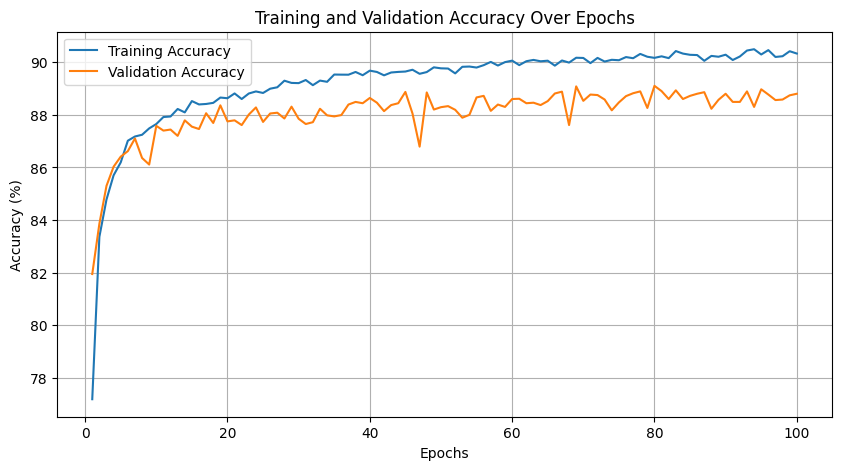

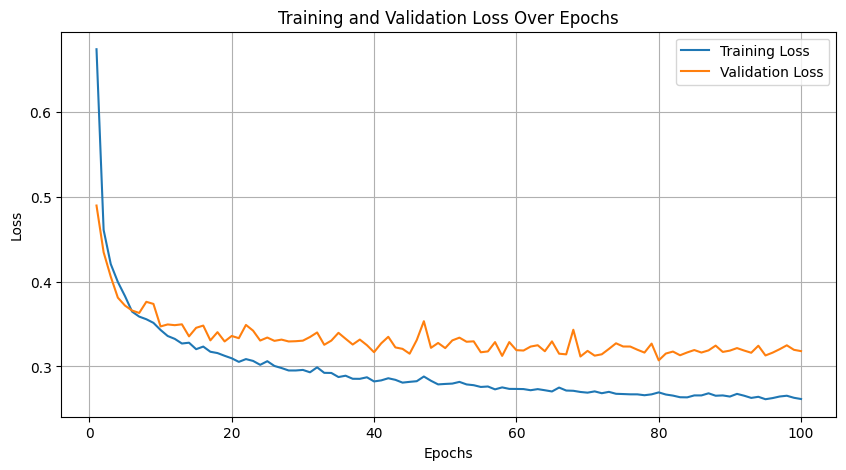

In [38]:
print(f"Best Train Accuracy: {max(train_accuracy):.2f}%")
print(f"Best Validation Accuracy: {max(val_accuracy):.2f}%")
print(f"Best Test Accuracy: {max(test_accuracy):.2f}%")

epochs = range(1, n_epoch + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


## Problem 2c)

Write your response in the Latex PDF report.

## Generate hw4_utils.py file

Paste your code here to test it on autograder, this should include and_gate, or_gate, threshold_activation1, predict_output_v2, preprocess_data, MLP. This will create a file called hw4_utils.py. Note that even if some Errors show up in the autograder, it does not mean your code does not work. We will still look into your implementation manually.

In [39]:
%%writefile hw4_utils.py

# Paste your code here to test it on autograder, this should include and_gate, or_gate,
# threshold_activation1, predict_output_v2, preprocess_data, MLP. This will create a file
# called hw4_utils.py. Note that even if some Errors show up in the autograder, it does
# not mean your code does not work. We will still look into your implementation manually.

import numpy as np
import torch
import torch.nn as nn
import random


def threshold_activation1(x):
        """
    TODO: Implement one activation function (unit step function)

    Args:
      x (np.ndarray): input array

    Returns (np.ndarray): output array (with the same shape as input array)

    """
    # TODO:
    threshold = 0
    output = np.zeros_like(x)
    output[x >= threshold] = 1

    return output

def and_gate(x):
    """
    TODO: Implement an "AND" gate

    Args:
      x (np.ndarray): array with shape (n, 1), representing n neurons as inputs.

    Returns: (int): scalar of 1 or 0
    """
    # TODO:
    output = 1
    for i in x:
      if i != 1:
        output = 0
        break
    return output

def or_gate(x):
    """
    TODO: Implement an "OR" gate

    Args:
      x (np.ndarray): array with shape (n, 1)

    Returns: (int): scalar of 1 or 0
    """
    # TODO:
    output = 0
    for i in x:
      if i == 1:
        output = 1
        break
    return output

def predict_output_v2(X, W, b):
    """
    #TODO: Update usage of the gates in this function
    """
    ## Cache of Predictions
    predictions = []
    ## Cycle Trhough Data Points
    for idx in range(data.shape[0]):
        x = np.reshape(X[idx, :], (2, 1))
        # First layer
        first_layer_output = np.matmul(W, x) + b
        first_layer_output = threshold_activation1(first_layer_output)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        second_polygon = first_layer_output[5:10, :]
        first_gate_output = and_gate(first_polygon)
        second_gate_output = or_gate(second_polygon)
        # Output layer
        input_to_final_gate = [first_gate_output, second_gate_output]
        prediction = and_gate(input_to_final_gate)
        predictions.append(prediction)
    return predictions

def preprocess_data(X, Y, test_split=1/6):
  num_samples = X.shape[0]
  num_train_samples = int(num_samples * (1-test_split))

  data = np.column_stack((X,Y))
  np.random.shuffle(data)

  X_shuffled = data[:,:-1]
  Y_shuffled = data[:, -1]

  # Split the data into training and testing sets
  X_train, X_test = X_shuffled[:num_train_samples], X_shuffled[num_train_samples:]
  y_train, y_test = Y_shuffled[:num_train_samples], Y_shuffled[num_train_samples:]

  # Standardize X by subtracting the mean and dividing by the standard deviation
  mean = np.mean(X_train, axis=0)
  std = np.std(X_train, axis=0)

  X_train = (X_train - mean) / (std + 1e-8)
  X_test = (X_test - mean) / (std + 1e-8)

  # Convert the data to torch.Tensor objects
  X_train, X_test = torch.FloatTensor(X_train), torch.FloatTensor(X_test)
  y_train, y_test = torch.FloatTensor(y_train), torch.FloatTensor(y_test)

  return X_train, X_test, y_train, y_test

class MLP(nn.Module):
    def __init__(self, input_dim, layers_dims, output_dim, seed_value=None):
        """
        Initialize MLP.
        """
        super(MLP, self).__init__()

        ## TODO:
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_dim, layers_dims[0]))
        # self.layers.append(nn.Sigmoid())

        for i in range(1, len(layers_dims)):
          self.layers.append(nn.Linear(layers_dims[i-1], layers_dims[i]))
        #   self.layers.append(nn.Sigmoid())

        self.layers.append(nn.Linear(layers_dims[-1], output_dim))
        self.seed_value = seed_value
        self._initialize_weights()


    def _initialize_weights(self):
        """
        Initialize the weights and biases of the model.
        """

        ## TODO:
        for layer in self.layers:
          if isinstance(layer, nn.Linear):
            nn.init.xavier_uniform_(layer.weight)
            layer.bias.data.fill_(0.001)
            # nn.init.normal_(layer.bias, mean=0, std=0.01)


    def forward(self, x):
        """
        Forward pass through the network.

        Args:
            x (torch.Tensor): input tensor.

        Returns:
            torch.Tensor: output tensor.
        """
        # TODO:
        for layer in self.layers:
          x = layer(x)
          x = torch.sigmoid(x)
          # print("Layer Output Shape:", x.shape)  # Print the shape of the output at each layer
        return x

Overwriting hw4_utils.py
